In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("..") # Adds higher directory to python modules path.

print(f"Current working dir is {os.getcwd()}")

from utils import *
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = [15, 7]


# settings
data_root = '/home/jma/Python3.7/Cubist_2021_11'
dtcol = 'data_date'
seccol = 'security_id'

ds_id = 6
ds_filename = f'data_set_{ds_id}.csv'
scorecol = f'd{ds_id}'


df = preprocess_dataset_from_one_to_seven(data_root, ds_id, dtcol=dtcol, seccol=seccol)

Current working dir is /home/jma/Python3.7/Cubist_2021_11/dataset_process
Getting data from file 'data_set_6.csv' for score 'd6'.

df.head():
        data_date security_id  d6
102275 2010-01-04     1178501 NaN
102276 2010-01-04     1323901 NaN
102277 2010-01-04     1384501 NaN
102278 2010-01-04     1536201 NaN
102279 2010-01-04     1604101 NaN

df.tail():
        data_date security_id      d6
5023   2017-12-26     3538501 -0.8603
127263 2017-12-26     4943501     NaN
127264 2017-12-27  1117183801     NaN
127265 2017-12-28      647001     NaN
87053  2017-12-29     2968101  0.3022

getting df shape of (127266, 3)

No duplicates dtcol-seccol pairs is found.

shape of df (127266, 3).

data_date      datetime64[ns]
security_id            object
d6                    float64
dtype: object


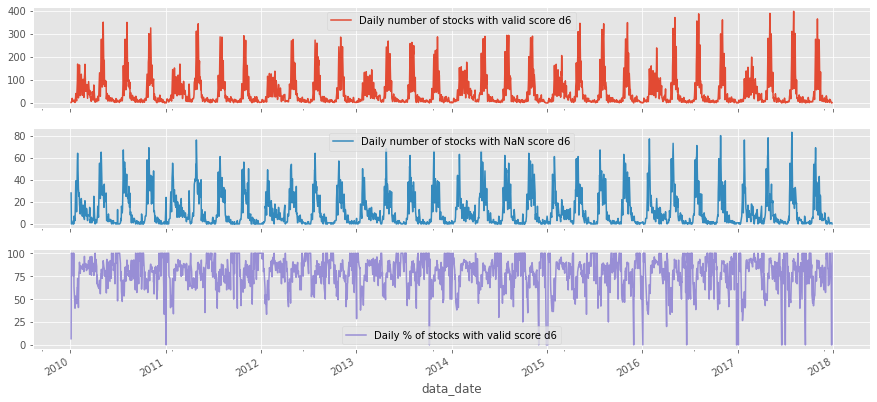

In [2]:
# plot the daily stock counts
plot_daily_stock_count(df, scorecol, dtcol=dtcol)

data_date          0
security_id        0
d6             24993
dtype: int64
data_date          0
security_id        0
d6             25052
dtype: int64
 Dropping all NaNs
                  d6
count  102214.000000
mean        0.380818
std        57.863395
min     -4018.240000
25%        -0.082600
50%         0.020500
75%         0.153100
max     12621.800000


<AxesSubplot:>

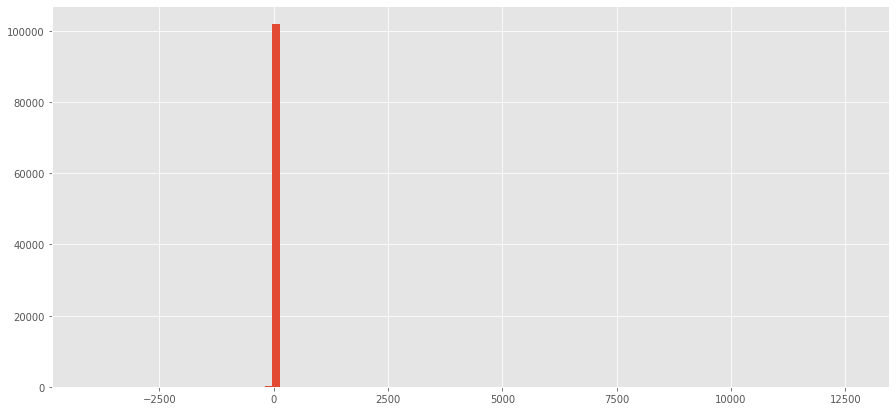

In [3]:
## Since 0 normally carries useless information in this type of sparse dataset, thus we replace 0 with NaN and drop them 
print(df.isnull().sum())
df[scorecol] = df[scorecol].replace([0, np.inf, -np.inf], np.nan)
print(df.isnull().sum())

print(" Dropping all NaNs")
df.dropna(subset=[scorecol], inplace=True)
print(df.describe())
df[scorecol].hist(bins=100)

In [4]:
print("Loading the generated research universe")
rsch_universe = pd.read_csv(os.path.join(data_root, 'new_processed_csvs/new_rsch_universe.csv.gz'), compression='gzip',
                            usecols=[dtcol, seccol],
                            parse_dates=[dtcol], dtype={seccol: str})

print("Merging the dataset with research universe.\n")
data = pd.merge(df, rsch_universe, on=[dtcol, seccol], how='inner')
print("Counting NaNs for each column.\n", data.isnull().sum())

Loading the generated research universe
Merging the dataset with research universe.

Counting NaNs for each column.
 data_date      0
security_id    0
d6             0
dtype: int64


<AxesSubplot:title={'center':'Daily d6 #stocks falling into the trading universe'}, xlabel='data_date'>

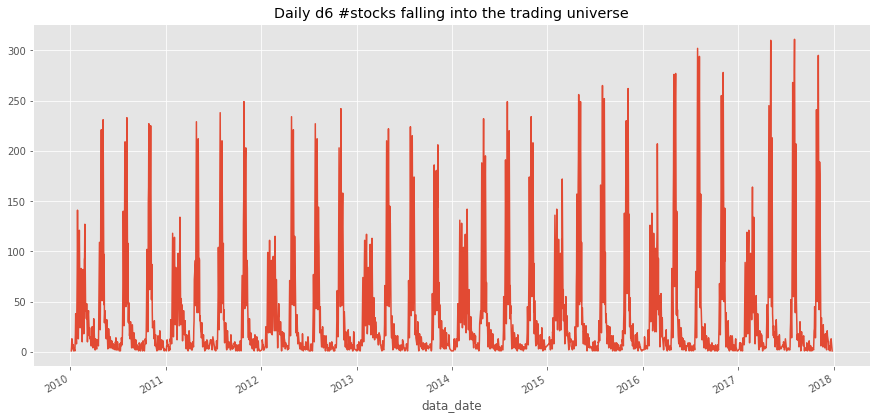

In [5]:
data.groupby(dtcol).size().plot(title=f'Daily {scorecol} #stocks falling into the trading universe')

In [6]:
save_file_path = os.path.join(data_root, f'new_processed_csvs/new_data_{ds_id}.csv.gz')
print(f"data is saved to {save_file_path}")
data.to_csv(save_file_path, index=False, compression='gzip')

data is saved to /home/jma/Python3.7/Cubist_2021_11/new_processed_csvs/new_data_6.csv.gz


Getting data from file 'data_set_6.csv' for score 'd6'
data_date      datetime64[ns]
security_id            object
d6                    float64
dtype: object
data_date          0
security_id        0
d6             24993
dtype: int64
(127266, 3)


array([<AxesSubplot:xlabel='data_date'>, <AxesSubplot:xlabel='data_date'>],
      dtype=object)

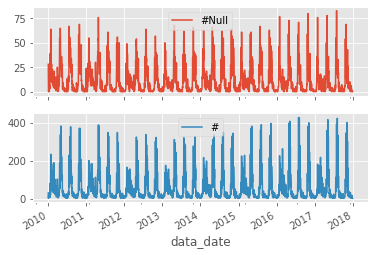

In [11]:
import pandas as pd
import numpy as np
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("ggplot")

# settings
data_root = '/home/jma/Python3.7/Cubist_2021_11'

ds_id = 6
ds_filename = f'data_set_{ds_id}.csv'
scorecol = f'd{ds_id}'
dtcol = 'data_date'
seccol = 'security_id'

print(f"Getting data from file '{ds_filename}' for score '{scorecol}'")

with zipfile.ZipFile(os.path.join(data_root, 'data_sets.zip')) as zf:
    df = pd.read_csv(zf.open(ds_filename), 
                     parse_dates=[dtcol], dtype={seccol: str, scorecol: np.float64})
    df[scorecol] = pd.to_numeric(df[scorecol], errors='coerce')
    
print(df.dtypes)
print(df.isnull().sum())
print(df.shape)

df.groupby(dtcol).apply(lambda x: pd.Series([x[scorecol].isnull().sum(), x.shape[0]],
                                                 index=['#Null', '#'])).plot(subplots=True)

In [12]:
assert not df.duplicated(subset=[dtcol, seccol]).any()

In [2]:
df.describe()

d6
count  102273.000000
mean        0.380598
std        57.846702
min     -4018.240000
25%        -0.082500
50%         0.020400
75%         0.153000
max     12621.800000

In [3]:
df.loc[df[scorecol] == 0].sample(10)

data_date security_id   d6
45106 2010-03-10     5057901  0.0
45156 2017-07-27     2384701  0.0
45118 2011-04-28    19659301  0.0
45132 2013-08-29     1384601  0.0
45149 2016-11-04      230301  0.0
45146 2016-08-03     3388801  0.0
45147 2016-08-04  1114389401  0.0
45131 2013-08-07     4306901  0.0
45109 2010-05-03     3607801  0.0
45123 2012-07-20    31352101  0.0

security_id      d6
data_date                     
2017-08-03  1114389401  0.1363
2015-05-07  1114389401     NaN
2015-08-06  1114389401     NaN
2015-11-05  1114389401     NaN
2016-02-18  1114389401     NaN

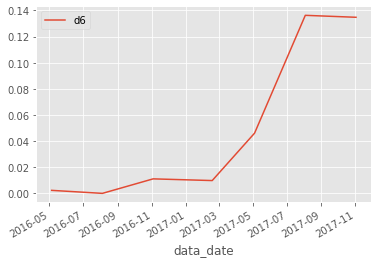

In [4]:
df.loc[df[seccol] == '1114389401'].set_index(dtcol).plot()
df.loc[df[seccol] == '1114389401'].set_index(dtcol).tail()

In [5]:
rsch_universe = pd.read_csv(os.path.join(data_root, 'rsch_universe.csv.gz'), compression='gzip',
                            usecols=[dtcol, seccol],
                            parse_dates=[dtcol], dtype={seccol: str})

data = pd.merge(df, rsch_universe, on=[dtcol, seccol], how='inner')
data.isnull().sum()

data_date          0
security_id        0
d6             12642
dtype: int64

In [6]:
data[scorecol] = data[scorecol].replace([0, np.inf, -np.inf], np.nan)
data.dropna(subset=[scorecol], inplace=True)

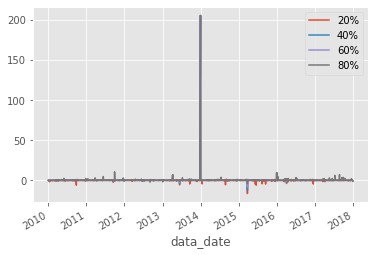

In [7]:
def plot_timeseries_dist(df, scorecol, dtcol, plot_min_max=False):
    
    if plot_min_max:
        ts_series = df.groupby(dtcol)[scorecol].apply(
            lambda x: pd.Series(
                [x.min(), x.quantile(0.2), x.quantile(0.4), x.quantile(0.6), x.quantile(0.8), x.max()],
                 index=['Min', '20%', '40%', '60%', '80%', 'Max']))
    else:
        ts_series = df.groupby(dtcol)[scorecol].apply(
            lambda x: pd.Series(
                [x.quantile(0.2), x.quantile(0.4), x.quantile(0.6), x.quantile(0.8)],
                 index=['20%', '40%', '60%', '80%']))
    ts_series.unstack().plot()
    
plot_timeseries_dist(data, scorecol, dtcol, plot_min_max=False)

In [9]:
data.to_csv(os.path.join(data_root, f'data_{ds_id}.csv.gz'), index=False, compression='gzip')

<AxesSubplot:xlabel='data_date'>

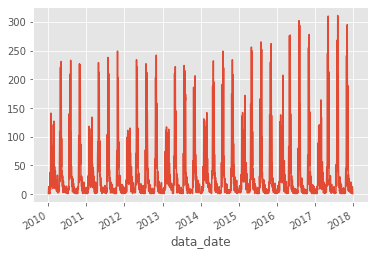

In [10]:
data.groupby(dtcol).size().plot()